In [198]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [199]:
#Reading the dataset
#And addapting the dataset
data = pd.read_csv('diabetes_binary_classification_data.csv')
df = data.drop(columns=["Sex", "Education", "Income", "AnyHealthcare", "NoDocbcCost", "MentHlth", "PhysHlth"])

In [200]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0


In [201]:
# The size of the data set was examined. It consists of 253680 observation units and 22 variables.
df.shape

(253680, 15)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  DiffWalk              253680 non-null  float64
 14  Age                   253680 non-null  float64
dtype

In [203]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,22.0,24.0,27.0,31.0,36.0,40.0,50.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [204]:
#this balnces the dataset
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Prepare features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)

# Check the new distribution of the target variable after undersampling
print(df_resampled['Diabetes_binary'].value_counts(normalize=True) * 100)


Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [205]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
df = pd.read_csv('diabetes_binary_classification_data.csv')

# Prepare features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the data
X_Oversampling, y_Oversampling = ros.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_Oversampling = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)

# Check the new distribution of the target variable after oversampling
print(df_Oversampling['Diabetes_binary'].value_counts(normalize=True) * 100)

# Now you can use df_resampled for further model training


Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [206]:
df_resampled.Diabetes_binary.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [207]:
df_Oversampling.Diabetes_binary.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

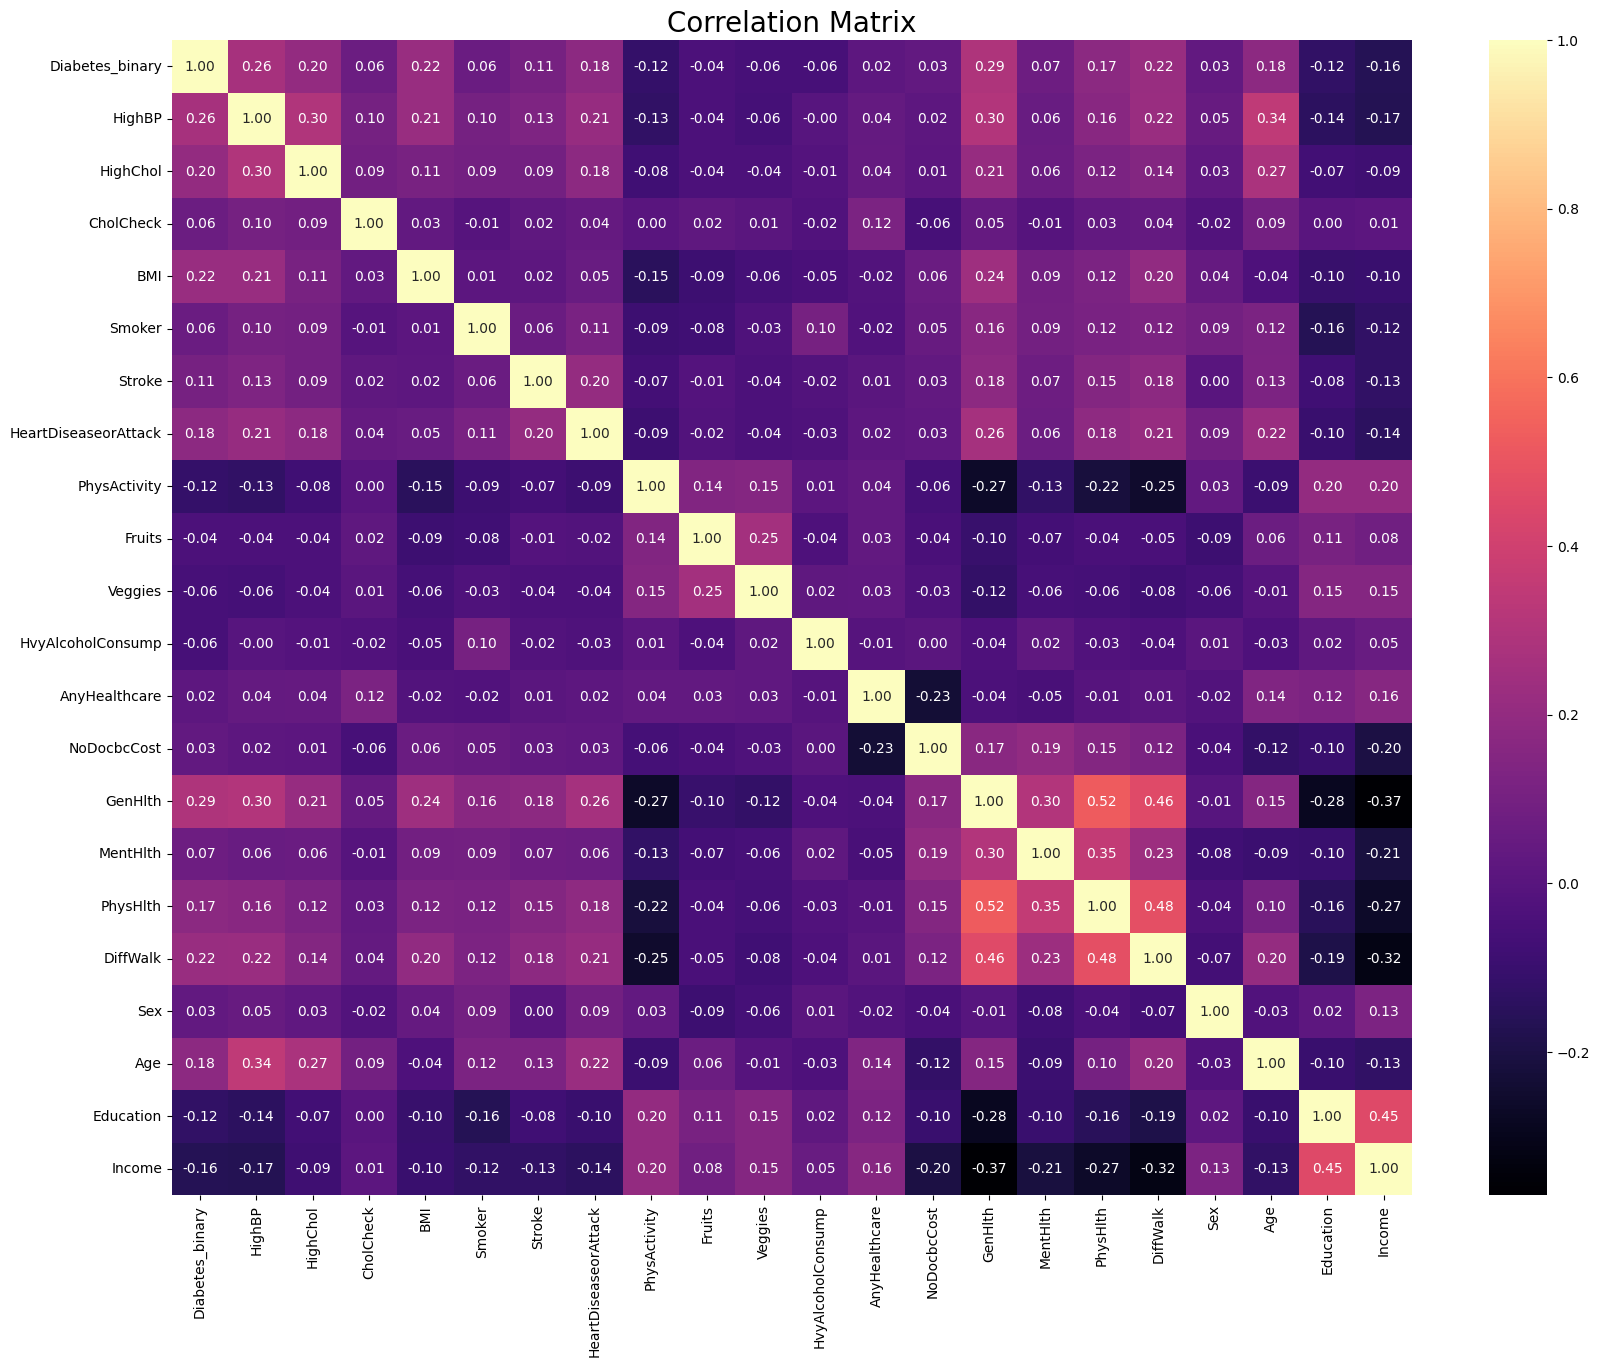

In [208]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

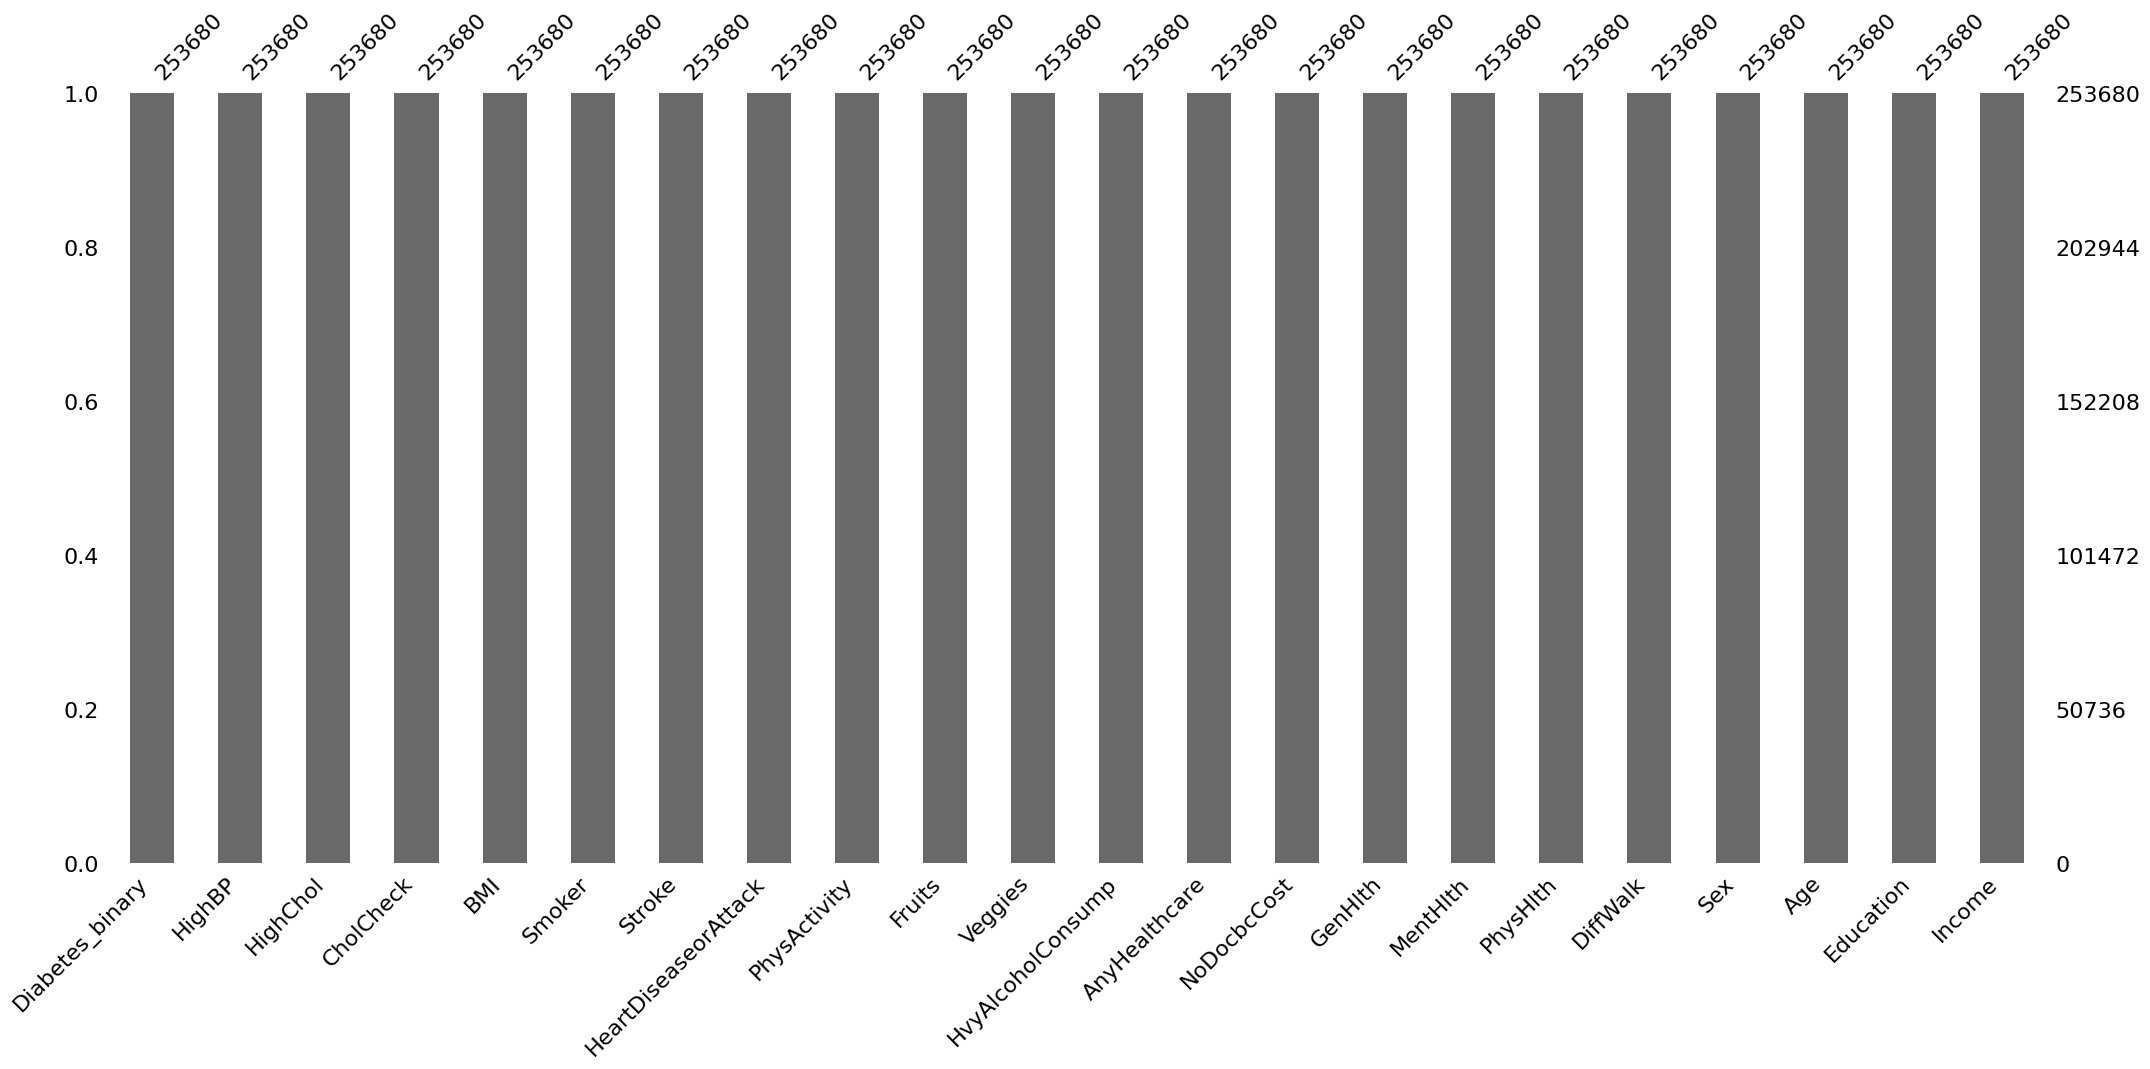

In [209]:
#Here we can see if we are missing any values in the observations nad in our case there is non
import missingno as msno
msno.bar(df);

In [210]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Diabetes_binary yes
HighBP no
HighChol no
CholCheck no
BMI yes
Smoker no
Stroke yes
HeartDiseaseorAttack yes
PhysActivity no
Fruits no
Veggies no
HvyAlcoholConsump yes
AnyHealthcare no
NoDocbcCost yes
GenHlth yes
MentHlth yes
PhysHlth yes
DiffWalk yes
Sex no
Age no
Education no
Income no


In [211]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('diabetes_binary_classification_data.csv')

# Prepare features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=1000))
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.7467309409851833
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     43773
         1.0       0.74      0.77      0.75     43561

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9486912313646461
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     43773
         1.0       0.91      0.99      0.95     43561

    accuracy                           0.95     87334
   macro avg       0.95      0.95      0.95     87334
weighted avg       0.95      0.95      0.95     87334

--------------------------------------------------
Model: XGBoost
Accuracy: 0.7682574942176014
Classification Report:
              precision  

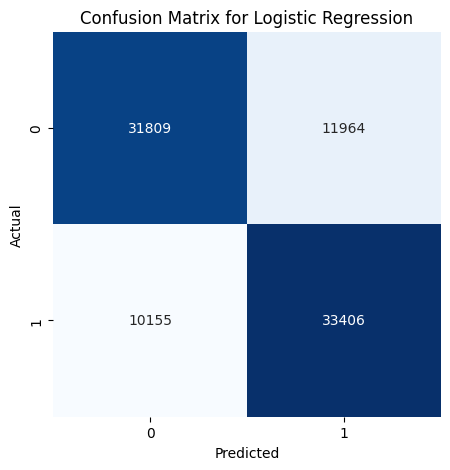

Model: Logistic Regression
Accuracy: 0.7467309409851833
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     43773
         1.0       0.74      0.77      0.75     43561

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334

--------------------------------------------------


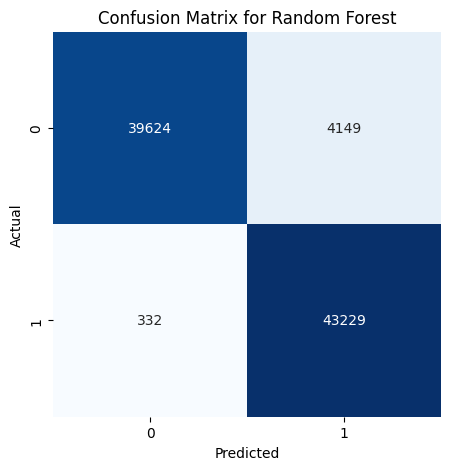

Model: Random Forest
Accuracy: 0.9486912313646461
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     43773
         1.0       0.91      0.99      0.95     43561

    accuracy                           0.95     87334
   macro avg       0.95      0.95      0.95     87334
weighted avg       0.95      0.95      0.95     87334

--------------------------------------------------


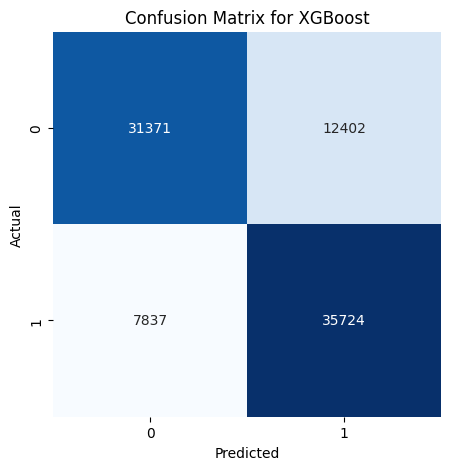

Model: XGBoost
Accuracy: 0.7682574942176014
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     43773
         1.0       0.74      0.82      0.78     43561

    accuracy                           0.77     87334
   macro avg       0.77      0.77      0.77     87334
weighted avg       0.77      0.77      0.77     87334

--------------------------------------------------


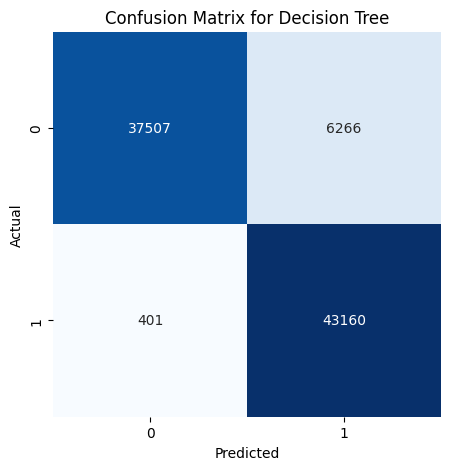

Model: Decision Tree
Accuracy: 0.9236608880848238
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     43773
         1.0       0.87      0.99      0.93     43561

    accuracy                           0.92     87334
   macro avg       0.93      0.92      0.92     87334
weighted avg       0.93      0.92      0.92     87334

--------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_binary_classification_data.csv')

# Prepare features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=1000))
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)
